In [1]:
%run preamble_2.py

In [2]:
%matplotlib inline

!mkdir -p images tables results

from IPython.display import HTML

In [3]:
DS_NAME = "QuantileCalibration"
DS_DATA = [ [ 1, 2, 3, 4 ] ]
DS_QUANTILES = np.linspace(0,1,101)

In [4]:
DS_DATA

[[1, 2, 3, 4]]

In [5]:
total = np.concatenate(DS_DATA)

In [6]:
# Set prom thresholds
CLASSES[1].thresholds = np.linspace(0, 4, 1001)

METHODS_SEL = [
 'exact',
 'prom',
 'tdigest',
 'hdr',
 'dd',
 'circllhist',
]

In [7]:
STATS = evaluate_all(DS_DATA, DS_QUANTILES)

# exact
Insert .
Merge ...
Quantiles ...
# prom
Insert .
Merge ...
Quantiles ...
# tdigest
Insert .
Merge ...
Quantiles ...
# hdr
Insert .
Merge ...
Quantiles ...
# dd
Insert .
Merge ...
Quantiles ...
# circllhist
Insert .
Merge ...
Quantiles ...


In [8]:
save_results(STATS, DS_NAME)

In [9]:
df = stats_quantiles(STATS)[METHODS_SEL]

In [10]:
df.iloc[::10]

,exact,prom,tdigest,hdr,dd,circllhist
q0,1.0,0.9960,1.0,0.999922,1.000000,1.05
q.1,1.3,0.9976,1.0,1.006633,1.000000,1.05
q.2,1.6,0.9992,1.3,1.006633,1.000000,1.05
q.3,1.9,1.9968,1.7,1.006633,1.000000,2.05
q.4,2.2,1.9984,2.1,2.013266,1.993662,2.05
q.5,2.5,2.0000,2.5,2.013266,1.993662,2.05
q.6,2.8,2.9976,2.9,2.013266,1.993662,3.05
q.7,3.1,2.9992,3.3,3.006477,2.974233,3.05
q.8,3.4,3.9968,3.7,3.006477,2.974233,4.05
q.9,3.7,3.9984,4.0,4.026532,2.974233,4.05


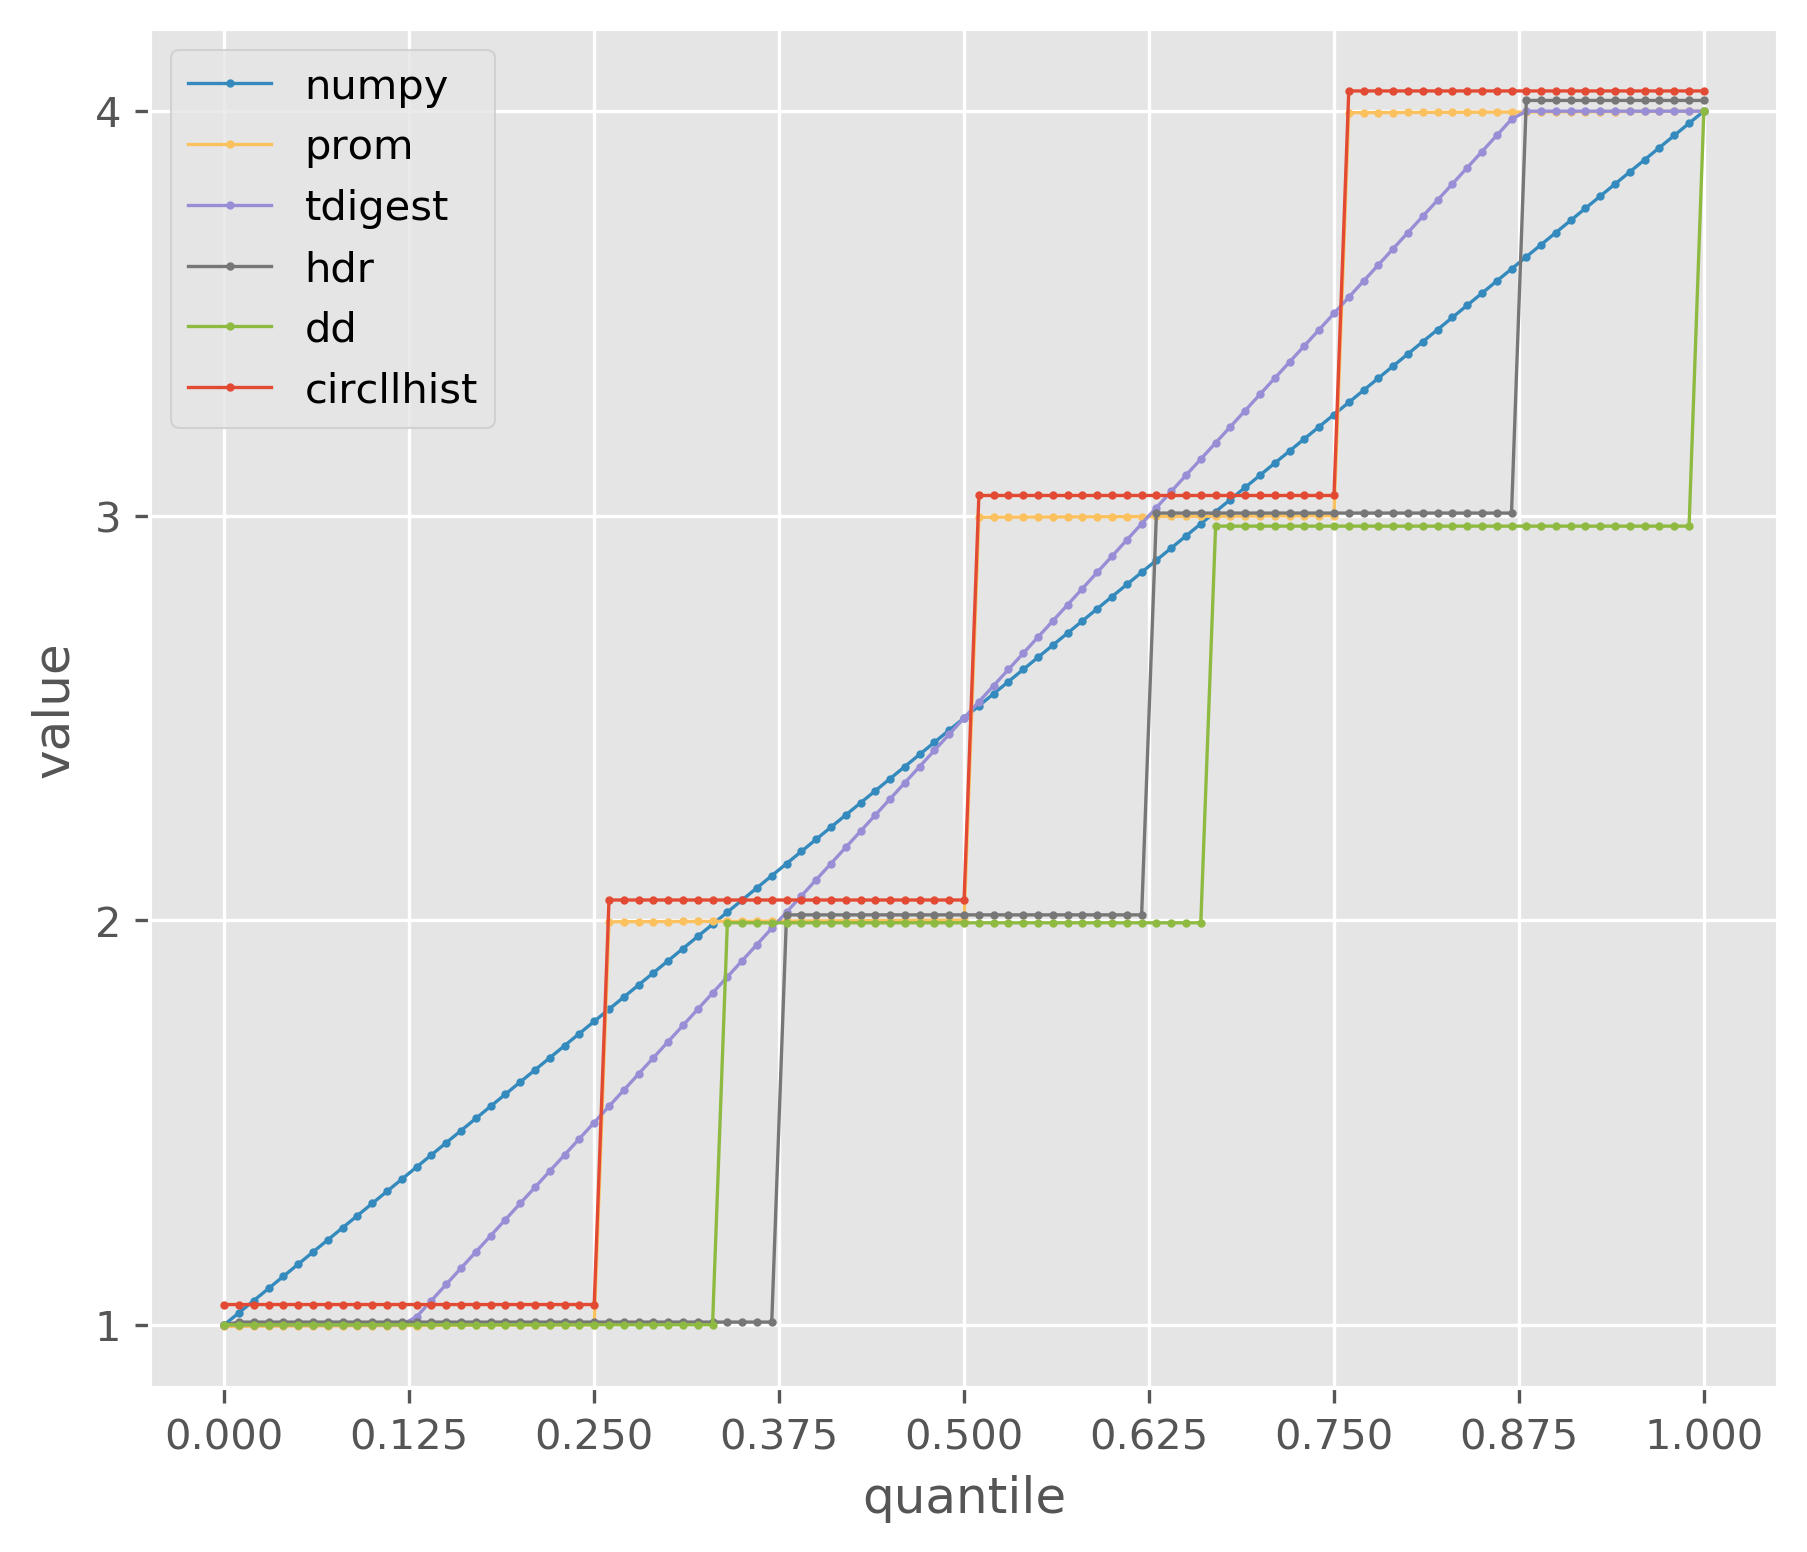

In [11]:
#
# Stats: Quantiles
#
df = stats_quantiles(STATS)[METHODS_SEL]

plt.figure(figsize=(7,6),dpi=300)
# plt.title("Practical Quantile Functions")

# exact, prom, tdigest, hdr, dd, circllhist
COLOR=[ "C1", "C4", 'C2', 'C3', 'C5', 'C0']

for i, name in enumerate(METHODS_SEL):
    plt.plot(DS_QUANTILES, [ STATS[name]["quantiles"][q] for q in DS_QUANTILES ] ,
             linestyle="-", linewidth=.8, 
             marker=".", markersize=2, alpha=1, 
             color=COLOR[i]
            )

ML = METHODS_SEL.copy()
# ML[0] = "exact (type-7 minimal)"
plt.legend(ML)
# plt.ylim(0.90, 0.410)
plt.ylabel("value")
plt.xlabel("quantile")
plt.xticks(np.linspace(0,1,9))
plt.yticks([1,2,3,4])
plt.legend("numpy prom tdigest hdr dd circllhist".split())
plt.savefig("images/practical_quantile_comparison", bbox_inches="tight", dpi=300)

# HTML(df.to_html())